## Exploratory Data Analysis

탐색적 데이터 분석을 통해 데이터를 통달해봅시다. with Titanic Data  


1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

### 0. 라이브러리 준비

In [1]:
## 라이브러리 불러오기


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## 동일 경로에 "train.csv"가 있다면:
## 데이터 불러오기

titanic_df = pd.read_csv("./train.csv")

### 1. 분석의 목적과 변수 확인

* 타이타닉 호에서 생존한 생존자들은 어떤 사람들일까?
  

In [3]:
## 상위 5개 데이터 확인하기

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## 각 Column의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 2. 데이터 전체적으로 살펴보기

In [5]:
## 데이터 전체 정보를 얻는 함수 : .describe()

titanic_df.describe() # 수치형 데이터에 대한 요약만을 제공!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
## 상관계수 확인! 두 변수 간의 동일한 경향성 여부 확인

titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


상관계수는 동일한 경향성의 여분만 확인할 수 있다.  


### Correlation is NOT Causation


상관성 : (A up, B up) or (A up, B down)  
인과성 :  A → B (A로부터 B가 발생, 둘 사이간의 종속성이 존재한다.)



In [7]:
## 결측치 확인

titanic_df.isnull()

# Age, Cabin, Embarked 에서 결측치 발견!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


null이면 True  
null이 아니면 False 반환

In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치를 해석하는데는 주관이 들어가게 되므로 어떻게 결측치를 다질 것인지 잘 유념해야 한다. 

### 3. 데이터 개별 속성 파악하기

#### Ⅰ. Survived Column

In [11]:
## 생존자, 사망자 명수는?

# titanic_df['Survived'].sum()
# or
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

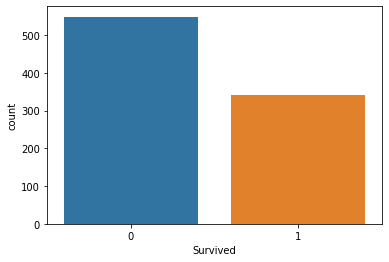

In [13]:
## 생존자수와 사망자수를 BarPlot으로 그려보기  sns.countplot()

sns.countplot(x='Survived', data=titanic_df) # titanic_df에서 Survived가 카테고리별로 카운팅해서 결과를 plotting 해줘라.
plt.show()

#### Ⅱ. Pclass

In [14]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
# 생존자 인원?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
# 생존 비율?

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

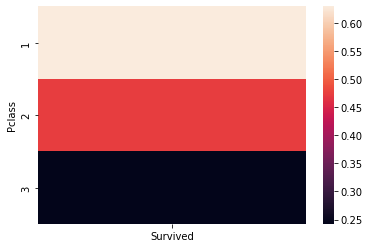

In [17]:
# 히트맵 활용

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

#### Ⅲ.  Sex

In [20]:
titanic_df[['Sex','Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [21]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [22]:
titanic_df.groupby(['Sex','Survived']).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

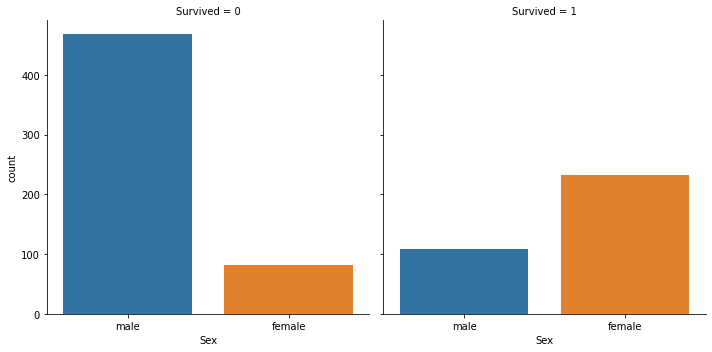

In [23]:
## sns.catplot

sns.catplot(x='Sex', col='Survived',kind='count',data=titanic_df) # column이라는 매개변수를 이용하여 case 분리
plt.show()

#### Ⅳ. Age

Remind : 결측치 존재!

In [25]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

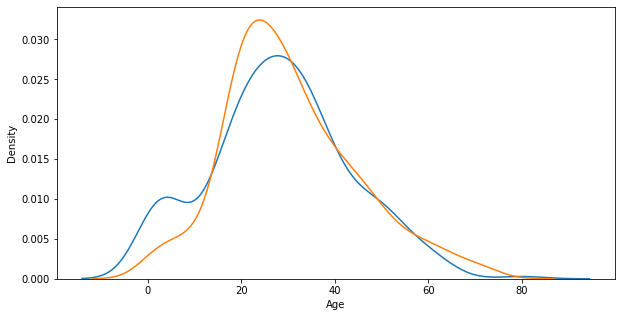

In [27]:
# seaborn에서 연속적인 데이터의 경향성을 부드럽게 확인할 수 있었던 plot : kde plot 커널밀도그림

## Survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1,1, figsize = (10,5)) 

sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax) # kdeplot을 그릴 축은 위에서 명시한 ax임을 적어줌
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax) # kdeplot을 그릴 축은 위에서 명시한 ax임을 적어줌

plt.show()

In [26]:
titanic_df[titanic_df.Survived == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

plt.subplots은 plotting의 과정에서 여러 개의 plot을 한 번에 보여줄때 쓰는 함수이다.  
plt.subplots(가로 개수, 세로 개수)  


figure (graph에 대한 도면) -> plot (figure안에 있는 x,y축 같은 틀) -> plot (틀 위에 그려지는 plot)  


하나의 틀에 여러 개의 plot을 그리려면 axis를 명시해줘야한다.


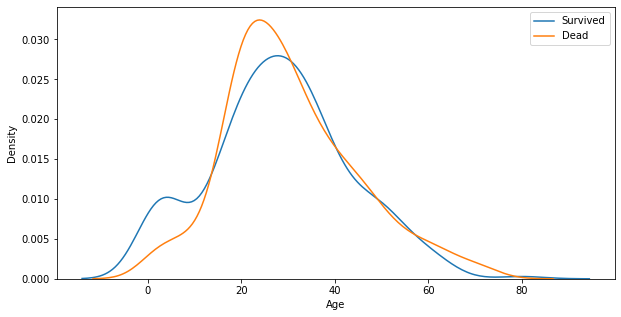

In [28]:
## Survived 1, 0과 Age의 경향성

fig, ax = plt.subplots(1,1, figsize = (10,5)) 

sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax) 
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax) 

plt.legend(['Survived', 'Dead'])

plt.show()

#### Appendix Ⅰ. Sex + Pclass vs Survived

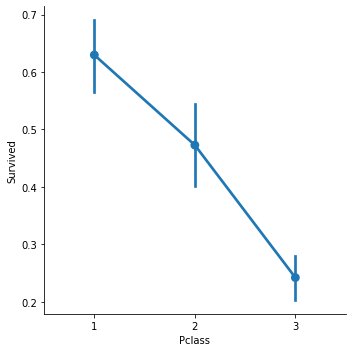

In [29]:
## 복합적인 요소를 시각화할 때는 sns.catplot을 많이 사용한다.

sns.catplot(x='Pclass', y='Survived', kind='point', data=titanic_df)
plt.show()

kind='point' : 포인트 그래프   
포인트 그래프는 각각 Pclass별 Survived에 대한 추정치를 점으로 보여준다.  
세로 막대기는 신뢰구간을 의미한다.  


hue: 위의 그래프를 다른 범주형 변수로 나눌 수 있는 키워드

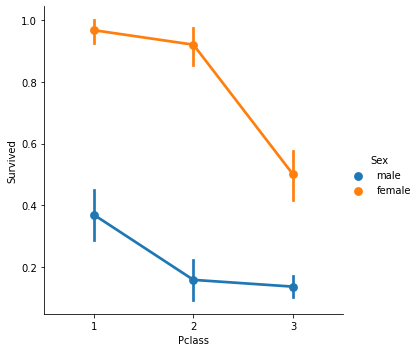

In [30]:
sns.catplot(x='Pclass', y='Survived',hue='Sex', kind='point', data=titanic_df)
plt.show()

단일 Column에 대한 분석도 중요하지만 여러 Column에 따라서 분석해보는 것도 중요함을 알 수 있다.

#### Appendix Ⅱ. Age + Pclass 

<AxesSubplot:ylabel='Density'>

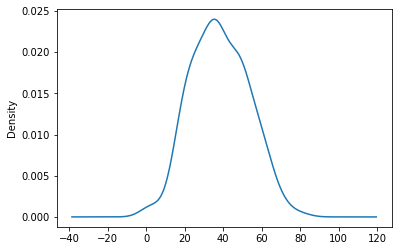

In [31]:
## Age graph with Pclass

titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

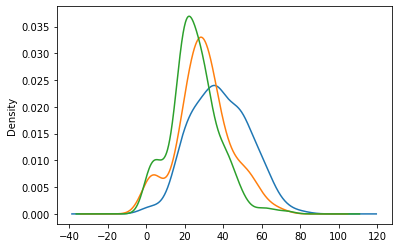

In [32]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')


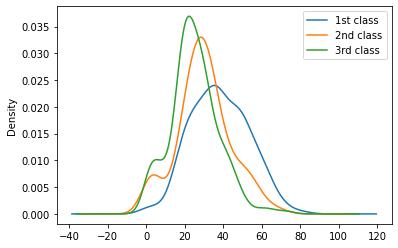

In [33]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class','2nd class', '3rd class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:

1. 데이터를 톺아봅시다.
   - 각 데이터는 어떤 자료형을 가지고 있나요?
   - 데이터에 **결측치**는 없나요? (반드시 확인) -> 있다면 바꿔줘야 하는지, 어떻게 메꿔줘야 하는지 데이터의 특성에 따라 고민해보자.
   - 데이터의 자료형을 바꿔줄 필요가 있나요? -> (바꿔준다면 encoding을 해야 함) 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
   - 가설을 개인의 경험에 의해서 도출되어도 상관이 없습니다.
   - 가설은 명확할 수록 좋습니다 ex) Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!
3. 가설을 검증하기 위한 증거를 찾아봅시다.
   - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
   - `.groupby()`를 통해서 그룹화된 정보에 통계랑을 도입하면 어떨까요?
   - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
   - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?